In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
fig, axs = plt.subplots(1, 1, layout='constrained')
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

In [2]:
from pathlib import Path
record_file = Path("./measurements/record_mag1_priblijenie.txt")
data = record_file.read_text(encoding="utf-8")

FileNotFoundError: [Errno 2] No such file or directory: 'measurements\\record_mag1_priblijenie.txt'

measurements\to_draw\магнит 1 отдаление.txt
measurements\to_draw\магнит 1 приближение.txt
measurements\to_draw\магнит 2 отдаление.txt
measurements\to_draw\магнит 2 приближение.txt
measurements\to_draw\магнит 3 отдаление.txt
measurements\to_draw\магнит 3 приближение с пластиной дюралюминий 4 мм.txt
measurements\to_draw\магнит 3 приближение с пластиной дюралюминий 6 мм.txt
measurements\to_draw\магнит 3 приближение с пластиной нержавеющей 1 мм.txt
measurements\to_draw\магнит 3 приближение.txt


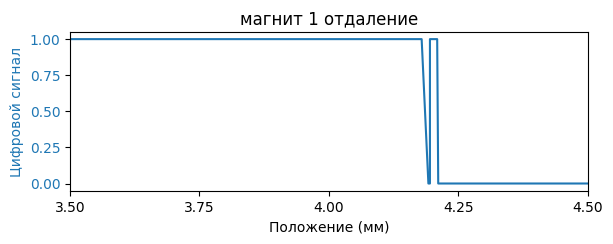

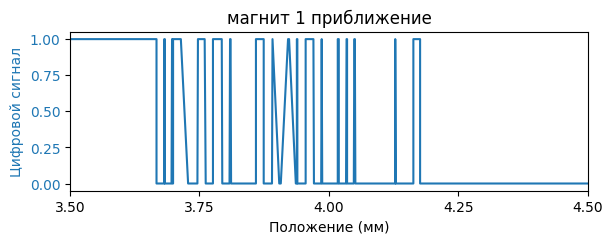

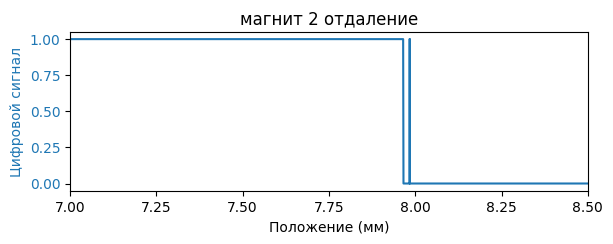

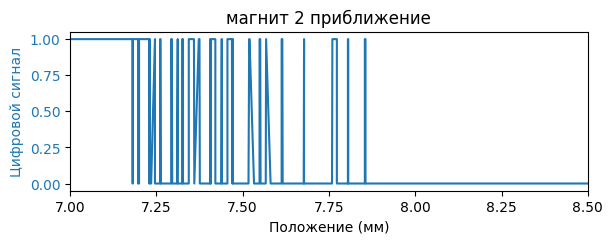

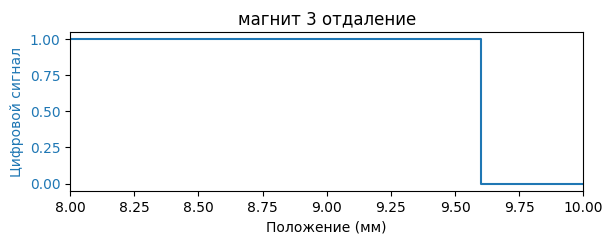

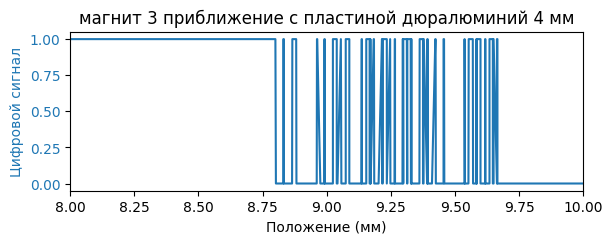

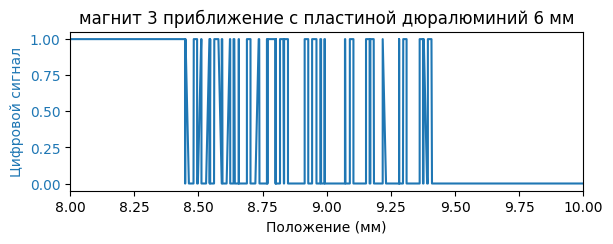

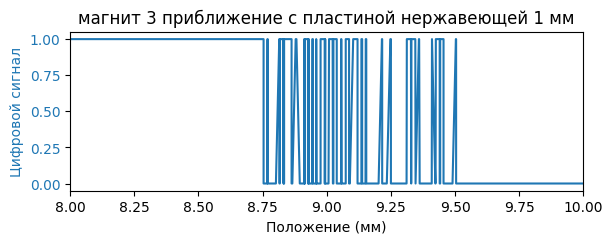

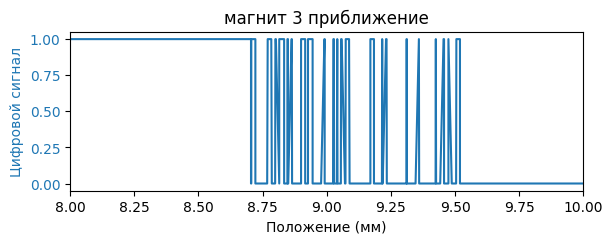

In [8]:
from pathlib import Path
import matplotlib.ticker as ticker

class PlotDrawer():
    def __init__(self, filepath):
        self.filepath = filepath

        self.time = []
        self.position = []
        self.digital_value = []
        self.analog_value = []
        self.axis_limit = [0, 11]

        self.parse()

    def parse(self):
        record_file = self.filepath
        data = record_file.read_text(encoding="utf-8")

        for line in data.strip().split("\n"):
            try:
                t, pos, digital, analog = map(float, line.split(" : "))
                self.time.append(t)
                self.position.append(pos)
                self.digital_value.append(digital)
                self.analog_value.append(analog)
            except: 
                pass

    def draw_grapgh(self):
        fig, ax1 = plt.subplots()

        # График положения
        ax1.set_xlabel("Положение (мм)")
        ax1.set_ylabel("Цифровой сигнал", color="tab:blue")
        ax1.plot(self.position, self.digital_value, label="Цифровой сигнал", color="tab:blue")
        ax1.tick_params(axis="y", labelcolor="tab:blue")
        ax1.set_xlim(self.axis_limit)

        space = 0.25
        ax1.xaxis.set_major_locator(ticker.MultipleLocator(space))

        # Вторая ось для аналогового значения
        # ax2 = ax1.twinx()
        # ax2.set_ylabel("Аналоговый сигнал", color="tab:red")
        # ax2.plot(time, analog_value, label="Аналоговый сигнал", color="tab:red", linestyle="dashed")
        # ax2.tick_params(axis="y", labelcolor="tab:red")

        # Показываем график
        fig.tight_layout(pad=2)
        return fig

dir_path = Path("./measurements/to_draw")
filepaths = list(dir_path.glob("*.txt"))

for filepath in filepaths:
    drawer = PlotDrawer(filepath)

    if "магнит 1" in filepath.stem:
        drawer.axis_limit = [3.5, 4.5]

    if "магнит 2" in filepath.stem:
        drawer.axis_limit = [7, 8.5]

    if "магнит 3" in filepath.stem:
        drawer.axis_limit = [8, 10]
    
    fig = drawer.draw_grapgh()
    print(filepath)
    
    fig.set_figheight(2)
    
    plt.title(filepath.stem)
    
    save_file = dir_path / "digital_graphs"
    save_file.mkdir(exist_ok=True)
    save_file = save_file/f"{filepath.stem}.png"
    plt.savefig(save_file, bbox_inches='tight')

[]

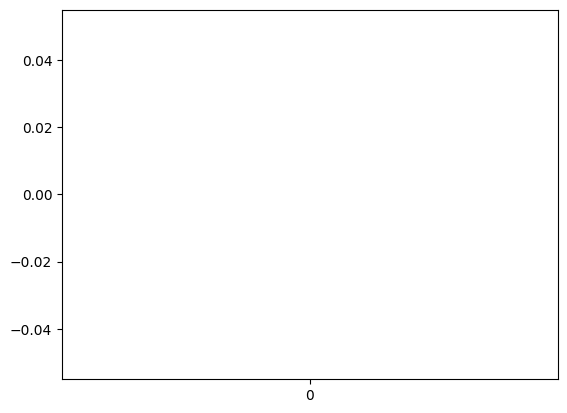

In [ ]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots()

ax1.plot()

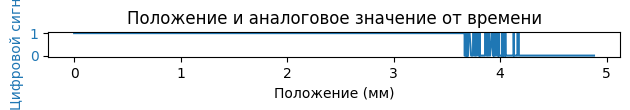

In [9]:
time = []
position = []
digital_value = []
analog_value = []

for line in data.strip().split("\n"):
    try:
        t, pos, digital, analog = map(float, line.split(" : "))
        time.append(t)
        position.append(pos)
        digital_value.append(digital)
        analog_value.append(analog)
    except: 
        pass

# Создаем фигуру и оси
fig, ax1 = plt.subplots()

# График положения
ax1.set_xlabel("Положение (мм)")
ax1.set_ylabel("Цифровой сигнал", color="tab:blue")
ax1.plot(position, digital_value, label="Цифровой сигнал", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Вторая ось для аналогового значения
# ax2 = ax1.twinx()
# ax2.set_ylabel("Аналоговый сигнал", color="tab:red")
# ax2.plot(time, analog_value, label="Аналоговый сигнал", color="tab:red", linestyle="dashed")
# ax2.tick_params(axis="y", labelcolor="tab:red")

# Показываем график
fig.set_figheight(1)
fig.tight_layout()
plt.title("Положение и аналоговое значение от времени")
plt.show()
